<a href="https://colab.research.google.com/github/Devphadatare/Cognifyz/blob/main/Lev_1_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Data Exploration and Preprocessing

#1. Identify the number of rows and columns

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Dataset .csv'
data = pd.read_csv(file_path)

# Identify the number of rows and columns
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 9551
Number of columns: 21


#2. Check for missing values in each column and handle them accordingly

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handle missing values (example: filling with mean for numeric columns, mode for categorical columns)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)


Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


#3. Perform data type conversion if necessary

In [3]:
# Perform data type conversion if necessary
data['Aggregate rating'] = data['Aggregate rating'].astype(float)

#4. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances

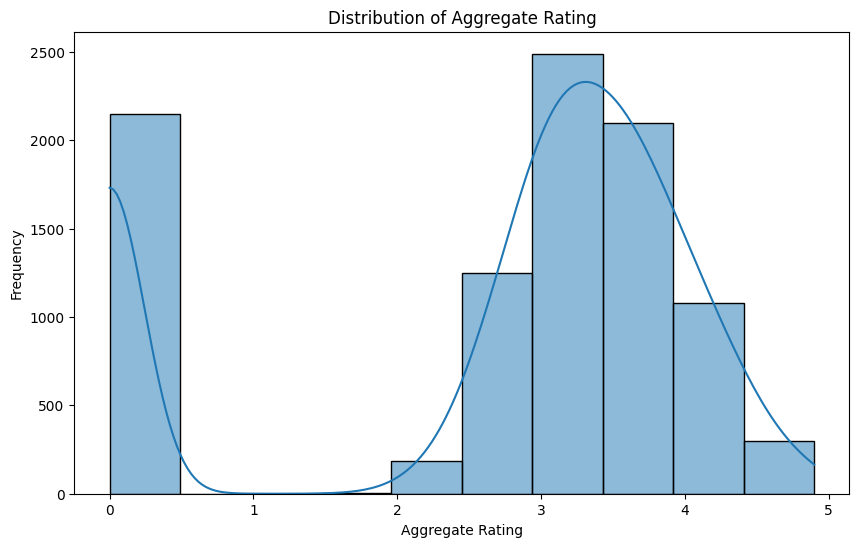

Class distribution of Aggregate Rating:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Identify any class imbalances
class_distribution = data['Aggregate rating'].value_counts()
print("Class distribution of Aggregate Rating:")
print(class_distribution)


#Task 2: Descriptive Analysis

#1. Calculate basic statistical measures for numerical columns

In [5]:
import pandas as pd

# Load the dataset
file_path = 'Dataset .csv'
data = pd.read_csv(file_path)

# Calculate basic statistical measures
numeric_stats = data.describe().T
print("Basic statistical measures for numerical columns:")
print(numeric_stats)


Basic statistical measures for numerical columns:
                       count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.719196e+01  7.728201e+

#2. Explore the distribution of categorical variables

<ipython-input-6-81fd7eb22d0f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Country Code', order=data['Country Code'].value_counts().index, palette='viridis')


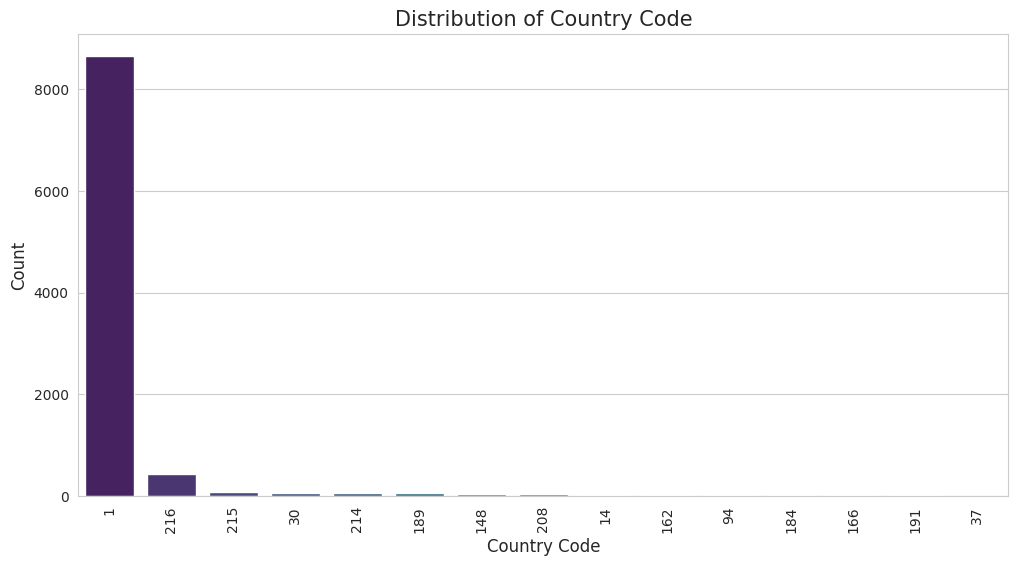

<ipython-input-6-81fd7eb22d0f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')


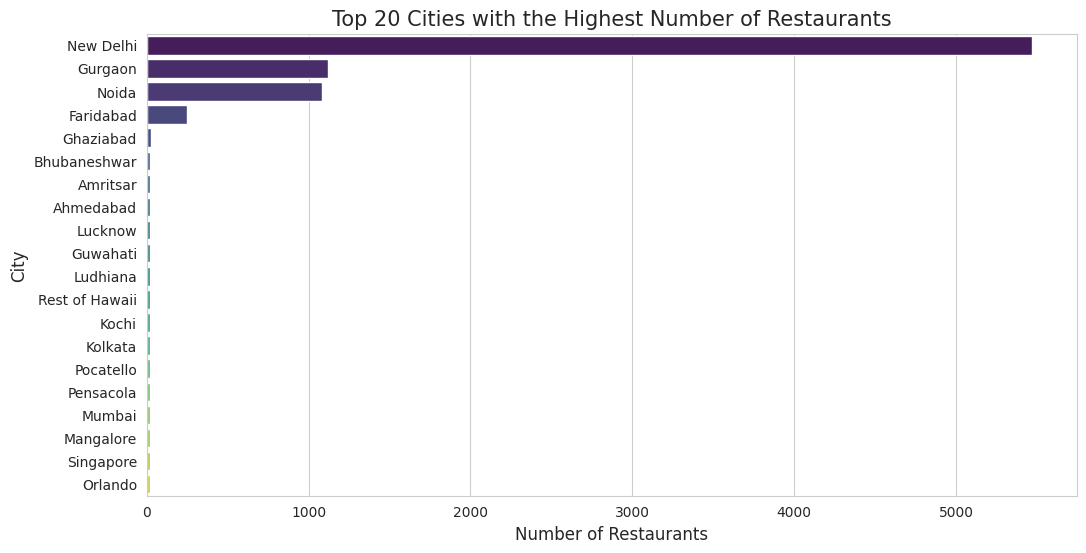

<ipython-input-6-81fd7eb22d0f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='viridis')


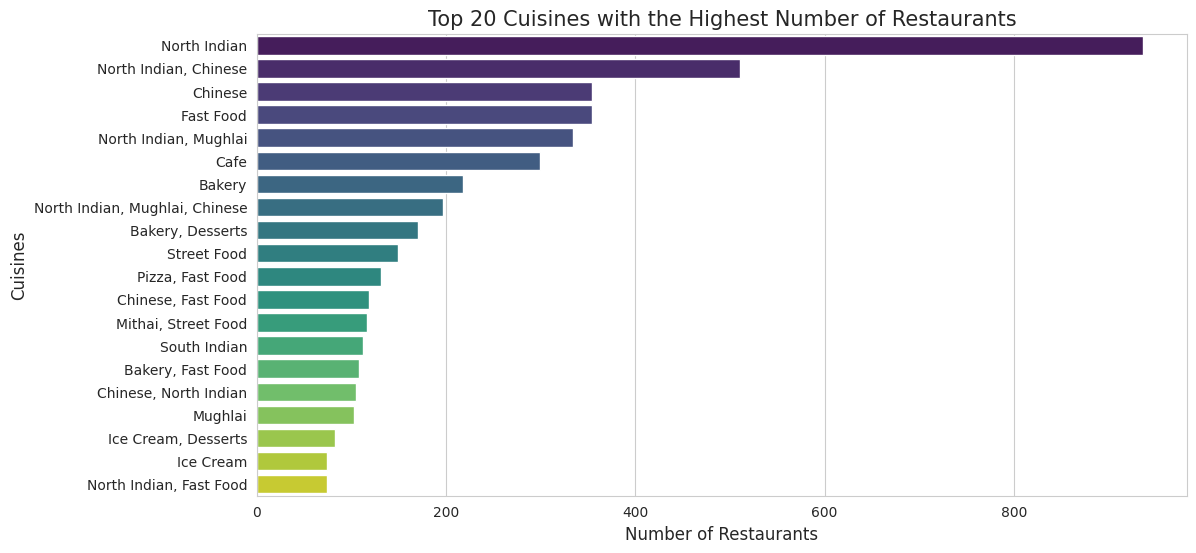

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Distribution of "Country Code"
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Country Code', order=data['Country Code'].value_counts().index, palette='viridis')
plt.title('Distribution of Country Code', fontsize=15)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Distribution of "City"
plt.figure(figsize=(12, 6))
top_cities = data['City'].value_counts().nlargest(20)  # Top 20 cities
sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')
plt.title('Top 20 Cities with the Highest Number of Restaurants', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

# Distribution of "Cuisines"
plt.figure(figsize=(12, 6))
top_cuisines = data['Cuisines'].value_counts().nlargest(20)  # Top 20 cuisines
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='viridis')
plt.title('Top 20 Cuisines with the Highest Number of Restaurants', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisines', fontsize=12)
plt.show()


#3. Identify the top cuisines and cities with the highest number of restaurants

In [7]:
# Top cuisines with the highest number of restaurants
top_cuisines = data['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines with the Highest Number of Restaurants:")
print(top_cuisines)

# Top cities with the highest number of restaurants
top_cities = data['City'].value_counts().head(10)
print("Top 10 Cities with the Highest Number of Restaurants:")
print(top_cities)


Top 10 Cuisines with the Highest Number of Restaurants:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64
Top 10 Cities with the Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


#Task 3: Geospatial Analysis

In [8]:
pip install pandas geopandas matplotlib seaborn folium

#1: Visualize the locations of restaurants on a map using latitude and longitude information

In [9]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
file_path = 'Dataset .csv'
data = pd.read_csv(file_path)

# Visualize the locations of restaurants on a map
m = folium.Map(location=[20, 0], zoom_start=2)
HeatMap(data[['Latitude', 'Longitude']].dropna(), radius=8, max_zoom=13).add_to(m)
m.save('restaurants_heatmap.html')


#2: Analyze the distribution of restaurants across different cities or countries

<ipython-input-10-13d4ae830590>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')


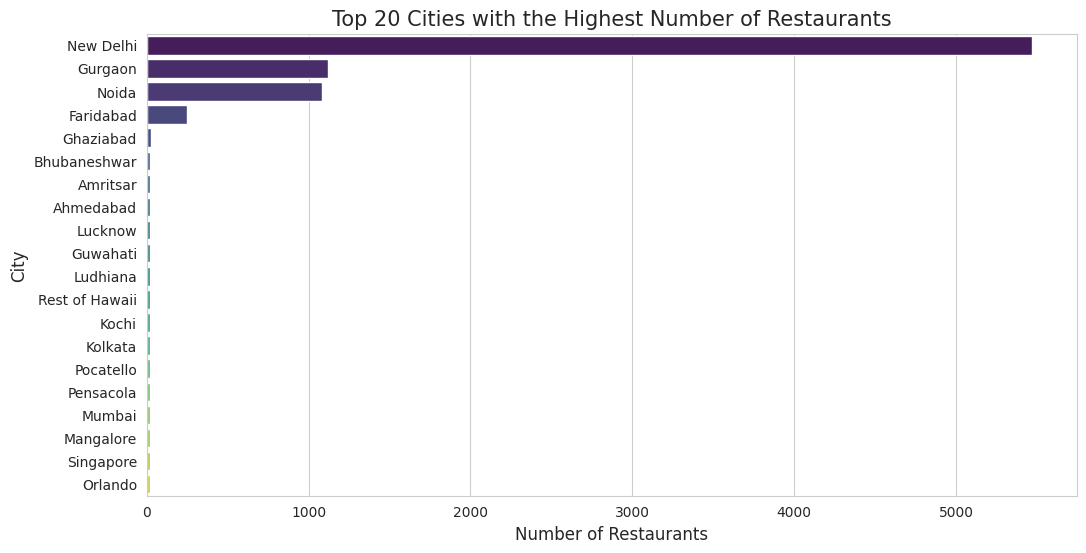

<ipython-input-10-13d4ae830590>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


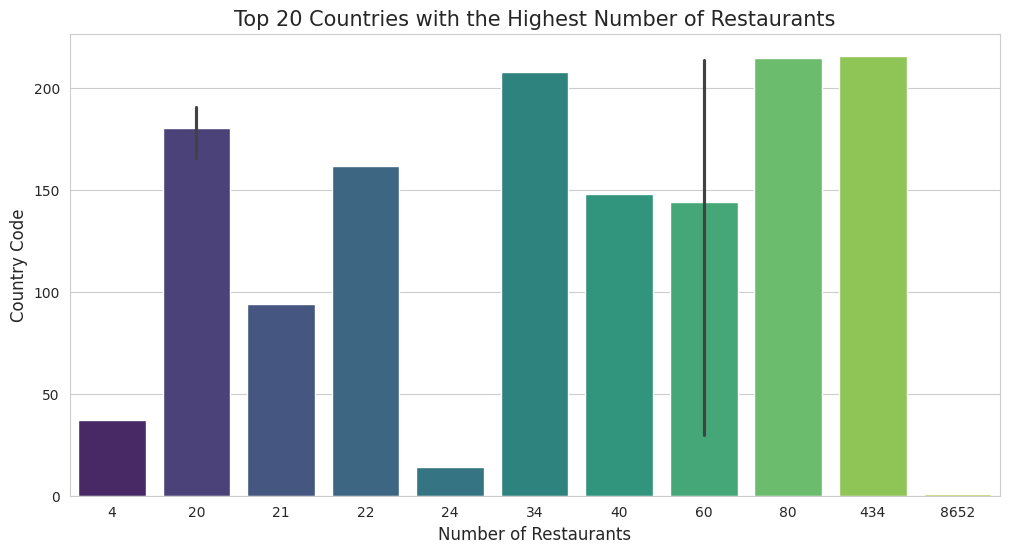

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Analyze the distribution of restaurants across different cities
plt.figure(figsize=(12, 6))
top_cities = data['City'].value_counts().nlargest(20)  # Top 20 cities
sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')
plt.title('Top 20 Cities with the Highest Number of Restaurants', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

# Analyze the distribution of restaurants across different countries
plt.figure(figsize=(12, 6))
top_countries = data['Country Code'].value_counts().nlargest(20)  # Top 20 countries
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 20 Countries with the Highest Number of Restaurants', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Country Code', fontsize=12)
plt.show()


#3: Determine if there is any correlation between the restaurant's location and its rating

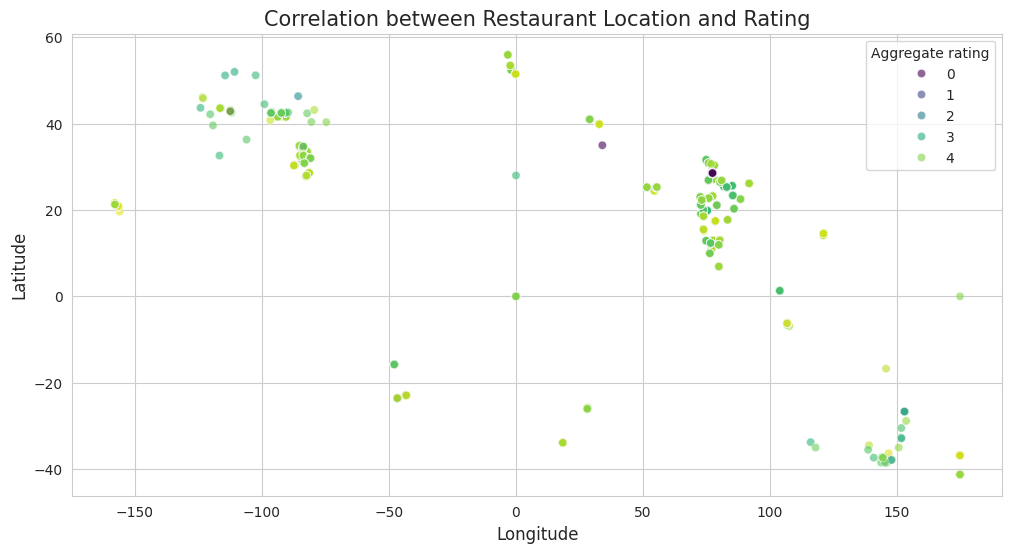

In [11]:
# Determine if there is any correlation between the restaurant's location and its rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='Aggregate rating', palette='viridis', alpha=0.6)
plt.title('Correlation between Restaurant Location and Rating', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()
